## **Linear Regression with  statsmodels library**
In this section we will see how the Python  statsmodels library can be used to implement regression functions whether it's a linear or multiple or logistic . We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

author: abdelrhman eltantawy

In [108]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sms;
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


In [109]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [110]:
df.shape

(25, 2)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [112]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [113]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

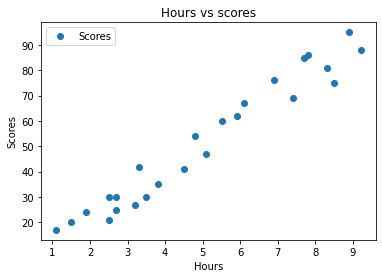

In [114]:
df.plot(x="Hours", y="Scores", style="o")
plt.xlabel("Hours");
plt.ylabel("Scores");
plt.title("Hours vs scores");
plt.show()

- the graph above tells us that there is a positive relationship between the Scores and the Hours

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 

In [115]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Preparing the Data
- Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". 
- Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. 

- We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [116]:
# splitting the dataset
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [117]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

#### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. Execute following command:

In [118]:
model = LinearRegression()
model.fit(x_train, y_train)
print("training is complete")

training is complete


In [119]:
# the intercept that calculated by linear regression function 
print(model.intercept_)

2.018160041434683


In [120]:
# and the slope 
print(model.coef_)

[9.91065648]


this means for every one unit increase in the hours studied, the change in the score is about 9.91% 

#### Making Predictions
- Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [125]:
print(x_test)
y_predicition = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [122]:
# to compare the actual test data with prediacted test data let's execute this script 
data = pd.DataFrame({"actual":y_test, "predicted":y_predicition})
data

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


- it's not very percise, but the predicted precentages are close to the actual ones

- now I will get our answer from the assignment
- what will be predicted score if a student studies for 9.25 hrs/day ?


In [128]:
answer = model.predict(np.array([9.25]).reshape(1,1))
answer

array([93.69173249])

#### Evaluating the Algorithm
let's evaluate the performance of our algorithm 


In [123]:
print("mean absolute error:", metrics.mean_absolute_error(y_test, y_predicition))
print("mean squared error: ", metrics.mean_squared_error(y_test, y_predicition))

mean absolute error: 4.183859899002975
mean squared error:  21.5987693072174


- the value of mean absolute error is 4.18 and it's less than the mean value of the precentages
of all students 51.48 this means that our algorithm did a decent job 